# 3.3.6	住戸位置と総外皮に対する外気に接する外皮の面積割合への配慮

In [1]:
import numpy as np
from scipy.interpolate import BSpline, make_interp_spline, interp1d
from scipy.optimize import curve_fit
import seaborn as sns

In [2]:
# 以下の4点の近傍を通るようにフィッティングする
x = [0.00, 0.87, 1.12, 3.00]
y = [0.00, 0.16, 0.65, 1.00]

def logistic_fit(x, a, b):
    return 1 / (1 + np.exp(-a * (x + b)))

# ロジスティック曲線にフィッティング
# ※それっぽい曲線にフィッティングできるように、パラメータa,bの初期値と範囲を指定する
param, cov = curve_fit(logistic_fit, x, y, p0=(1.0, -1.0), bounds=([0.0, -np.inf], [np.inf, 0]))
print(param)

[ 9.10907512 -1.05204145]


<AxesSubplot: >

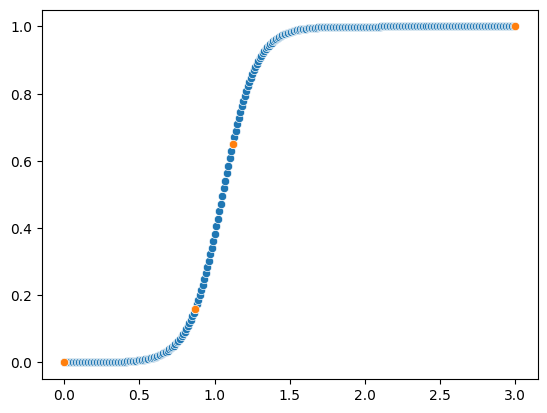

In [3]:
# 0≦UA≦3.0 の範囲で推定したロジスティック曲線をプロット
array_x = np.arange(0, 3.0, 0.01)
array_y_fit = logistic_fit(array_x, param[0], param[1])
sns.scatterplot(x=array_x, y=array_y_fit, markers='')

# ロジスティック曲線の推定に使用した各点をプロット
sns.scatterplot(x=x, y=y)